# Decission Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [ ]:
df =pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.columns.unique()

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df = df.drop(['Income','Education','AnyHealthcare','NoDocbcCost','GenHlth'], axis ='columns')

In [ ]:
df.columns.unique()

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
X = df.drop(['HeartDiseaseorAttack'], axis = 'columns')
Y = df.HeartDiseaseorAttack

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size =0.2,random_state =42)

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test,Y_test)

0.8556218708022958

In [ ]:
accuracy = metrics.accuracy_score(Y_test,y_pred)
print(accuracy)

0.8556218708022958


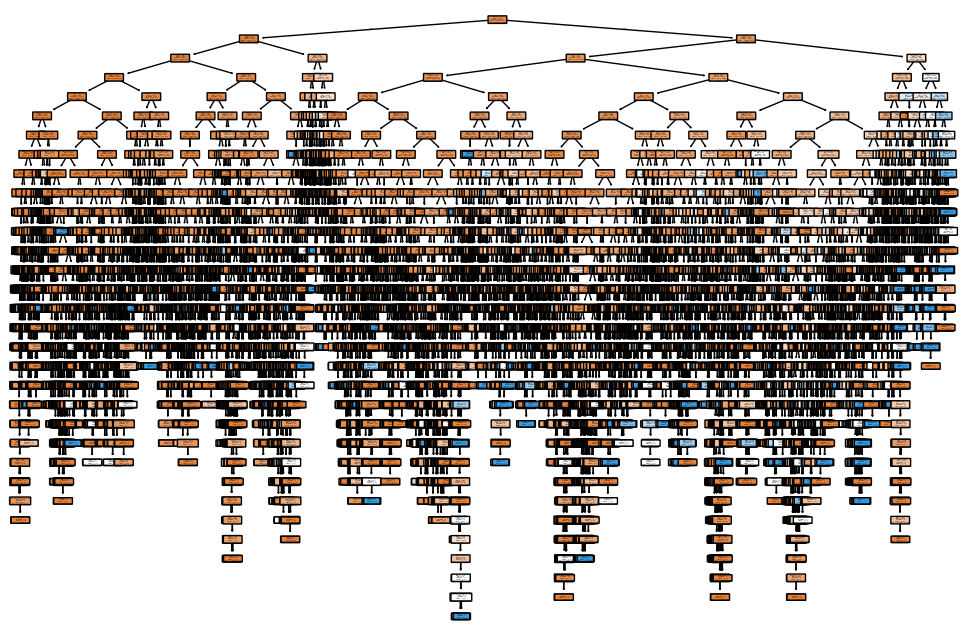

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# After training the model:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(model,
          feature_names=X.columns,  # Use column names for feature labels
          class_names=['No Heart Disease', 'Heart Disease'],  # Customize class names
          filled=True,  # Fill nodes with colors
          rounded=True)  # Round node corners

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ccp_alpha
param_grid = {
    'ccp_alpha': np.arange(0.0, 0.1, 0.001)  # Explore values between 0.0 and 0.1
}

# Create a GridSearchCV object to find the best ccp_alpha
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

# Get the best model with the optimal ccp_alpha
best_model = grid_search.best_estimator_





In [ ]:
# Now use the best_model for prediction
y_pred = best_model.predict(X_test)

# Evaluate the performance of the pruned model
accuracy = metrics.accuracy_score(Y_test, y_pred)
print(accuracy)

0.9078642080840151


In [ ]:
 best_model.score( X_test,Y_test)


0.9078642080840151

In [ ]:
 best_model.score( X_train,Y_train)


0.9065514714861399

In [ ]:
print(tree.export_graphviz(model))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.169\nsamples = 32756\nvalue = [29695, 3061]"] ;
1 [label="x[5] <= 0.5\ngini = 0.077\nsamples = 18875\nvalue = [18114, 761]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[15] <= 9.5\ngini = 0.069\nsamples = 18523\nvalue = [17863, 660]"] ;
1 -> 2 ;
3 [label="x[13] <= 0.5\ngini = 0.039\nsamples = 14207\nvalue = [13928, 279]"] ;
2 -> 3 ;
4 [label="x[15] <= 6.5\ngini = 0.03\nsamples = 13238\nvalue = [13035, 203]"] ;
3 -> 4 ;
5 [label="x[6] <= 0.5\ngini = 0.012\nsamples = 7220\nvalue = [7176, 44]"] ;
4 -> 5 ;
6 [label="x[11] <= 29.5\ngini = 0.01\nsamples = 6974\nvalue = [6938, 36]"] ;
5 -> 6 ;
7 [label="x[1] <= 0.5\ngini = 0.009\nsamples = 6786\nvalue = [6756, 30]"] ;
6 -> 7 ;
8 [label="x[4] <= 0.5\ngini = 0.006\nsamples = 5665\nvalue = [5649.0, 16.0]"] ;
7 -> 8 ;
9 [label="x[12] <= 0.5\ngini = 0.003\nsamples = 3904\nvalue = [3899, 5]"] ;
8 -> 9

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Rf  = RandomForestClassifier( n_estimators = 30 )
Rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
y_pre =  Rf.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test, y_pred)
print(accuracy)

0.9078642080840151


In [ ]:
Rf.score(X_test,Y_test)

0.8965838319697155

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pre)
print(cm)

[[116004   2948]
 [ 10602   1470]]


Text(33.22222222222222, 0.5, 'Predicted')

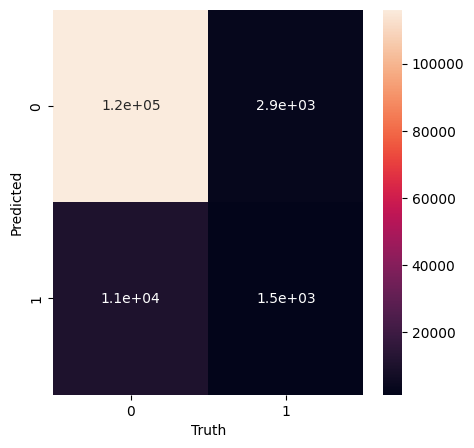

In [ ]:
plt.figure(figsize =(5,5))
sns.heatmap(cm,annot =  True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [ ]:
# Define the parameter grid for ccp_alpha
param_grid = {
    'ccp_alpha': np.arange(0.0, 0.1, 0.001)  # Explore values between 0.0 and 0.1
}

# Create a GridSearchCV object to find the best ccp_alpha
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

# Get the best model with the optimal ccp_alpha
b_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

# Evaluate the performance of the pruned model
accuracy = metrics.accuracy_score(Y_test, y_pred)
print(accuracy)

0.9078642080840151


In [ ]:
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'ccp_alpha': 0.001}
